In [1]:
# Import libraries
from lxml import html
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
plotly.__version__

'2.7.0'

In [3]:
results = pd.read_csv('../Data_output/results_Hampton2018.csv')
results.head()

,place,time_total_hhmmss,name,city,div,div_place,number,swim_mmss,t1_mmss,bike_mmss,t2_mmss,run_mmss,time_total,swim,bike,run,t1,t2
0,1,01:15:21,Eryn Weldon,Moncton,f20-29,1/28,245,06:23,02:26,39:40,01:44,25:11,75.350000,6.383333,39.666667,25.183333,2.433333,1.733333
1,2,01:16:28,Carlie Lemoine,Hampton,f30-39,1/77,139,08:03,01:27,39:47,01:25,25:50,76.466667,8.050000,39.783333,25.833333,1.450000,1.416667
2,3,01:17:26,Michaela Kearns,Lower Coverdale,f20-29,2/28,116,08:48,01:44,39:12,01:32,26:12,77.433333,8.800000,39.200000,26.200000,1.733333,1.533333
3,4,01:17:37,Lisanne Maurice,Moncton,f40-49,1/69,158,09:27,01:04,38:42,01:10,27:17,77.616667,9.450000,38.700000,27.283333,1.066667,1.166667
4,5,01:19:03,Jocelyn LeBlanc,Moncton,f20-29,3/28,135,09:00,01:27,38:32,01:07,28:59,79.050000,9.000000,38.533333,28.983333,1.450000,1.116667


A couple cells in here for experimentation with plotly plots and other things for Dash app:

In [50]:
results[results['name']=='Lindsay Brin']['swim'].values[0]

10.783333333333333

In [86]:
input_name = 'Lindsay Brin'
input_name_2 = 'Rachel Kidd'
subset_sport_name = 'swim'
time1 = results[results['name']==input_name][subset_sport_name].values[0]
time2 = results[results['name']==input_name_2][subset_sport_name].values[0]
time_difference = abs(time1 - time2)
if (time1 < time2):
    print("{0} was faster than {1} by {2}".format(
            input_name,
            input_name_2,
            convert_min_to_time(time_difference)))

Lindsay Brin was faster than Rachel Kidd by 0:00:43.00


In [111]:
vline_name_name = 'Lindsay Brin'
vline_name_2_name = 'Rachel Kidd'
div_1 = results[results['name']==vline_name_name]['div'].values[0]
div_2 = results[results['name']==vline_name_2_name]['div'].values[0]
times_div_1 = results[results['div']==div_1][subset_sport_name].dropna()
times_div_2 = results[results['div']==div_2][subset_sport_name].dropna()
max(15,8)

15

In other analysis I found out that there was an NaN for the last time - probably a DNF - so I'm removing rows where there's a NaN in the `time_total` column.  I'm doing this in a secondary df for analysis, so that I'm not removing the record for the woman with the DNF from the original dataset.

In [20]:
results_times = results[["time_total", "swim", "bike", "run", "t1", "t2"]].dropna(subset=['time_total'])
results_times.head()

,time_total,swim,bike,run,t1,t2
0,75.350000,6.383333,39.666667,25.183333,2.433333,1.733333
1,76.466667,8.050000,39.783333,25.833333,1.450000,1.416667
2,77.433333,8.800000,39.200000,26.200000,1.733333,1.533333
3,77.616667,9.450000,38.700000,27.283333,1.066667,1.166667
4,79.050000,9.000000,38.533333,28.983333,1.450000,1.116667


In [21]:
results_times.tail()

,time_total,swim,bike,run,t1,t2
211,152.983333,18.366667,69.483333,52.866667,9.600000,2.700000
212,153.283333,16.866667,74.733333,51.250000,7.200000,3.266667
213,153.833333,12.666667,72.933333,57.083333,8.083333,3.116667
214,181.566667,22.500000,116.583333,22.250000,13.416667,6.850000
215,185.100000,16.383333,85.050000,73.366667,6.966667,3.366667


In [22]:
results_times.describe()

,time_total,swim,bike,run,t1,t2
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,107.122068,11.872454,53.376312,36.492438,3.468519,1.946219
std,17.912332,2.798179,9.506737,7.393504,1.635803,0.885605
min,75.350000,5.833333,38.050000,22.250000,0.783333,0.800000
25%,94.095833,10.125000,47.354167,31.312500,2.379167,1.379167
50%,105.991667,11.483333,52.425000,35.550000,3.175000,1.758333
75%,116.087500,12.916667,57.545833,40.975000,4.187500,2.237500
max,185.100000,26.900000,116.583333,73.366667,13.416667,6.850000


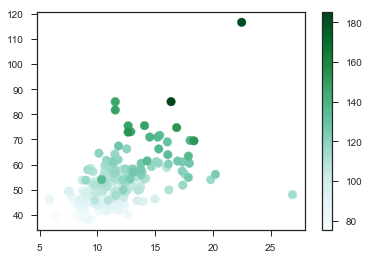

In [23]:
points = plt.scatter(results["swim"], 
                     results["bike"],
                    c = results["time_total"],
                    s = 75, 
                    cmap = "BuGn")
plt.colorbar(points)

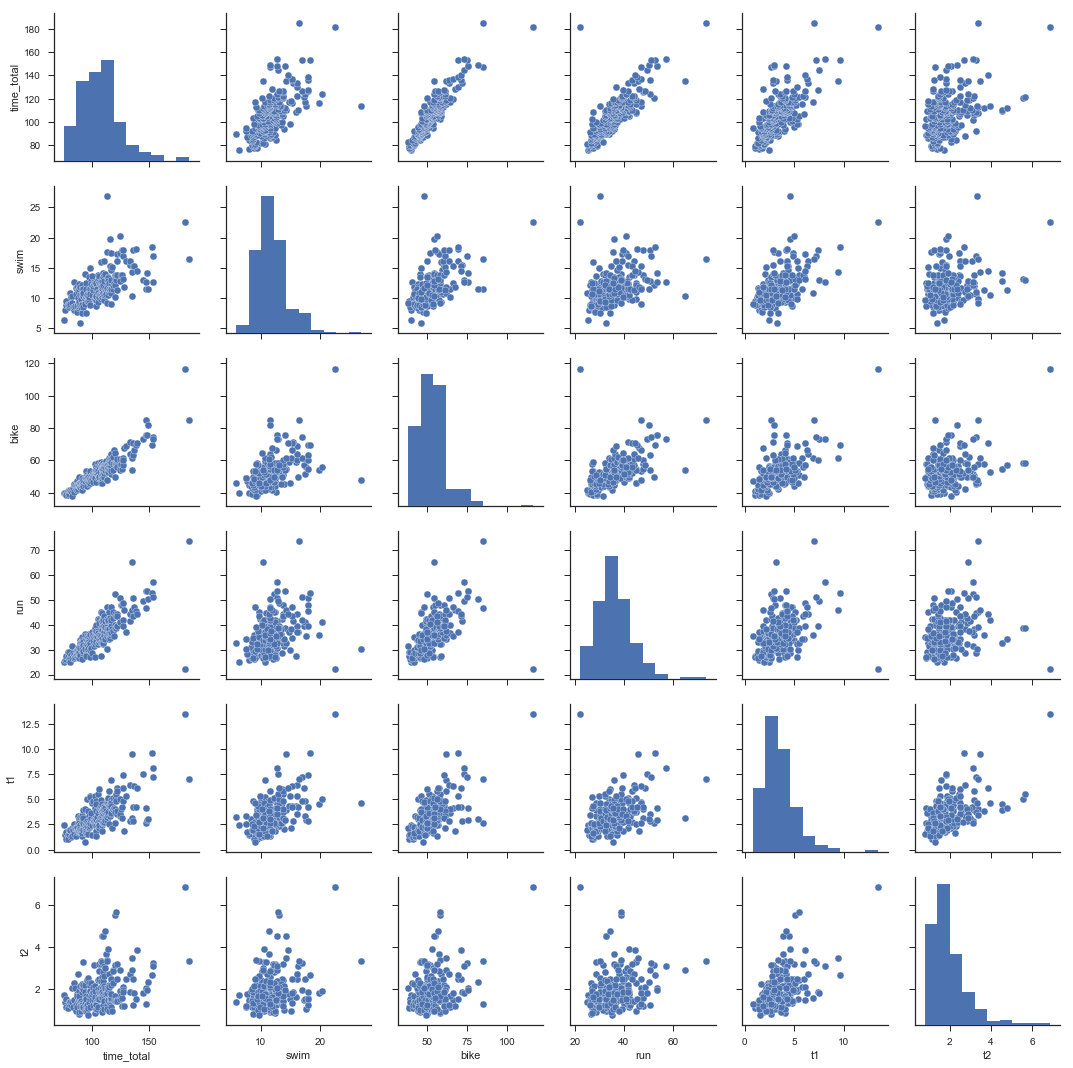

In [24]:
sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(iris)

g = sns.pairplot(results_times)

Could consider printing the regression line and r2 on plot and see if there are better correlations between activities than between activities and transition times (or between t1 and t2).

Take a look at a histogram of all results and where I fit relative to the others:

In [44]:
myname = "Lindsay Brin"

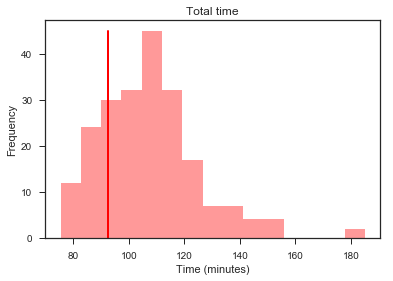

In [45]:
sns.distplot(results[["time_total"]].dropna(), kde = False, color = "Red")
plt.title("Total time")
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.plot([results.loc[results['name'] == myname]["time_total"].values]*2, [0, 45], linewidth=2, color = "Red")

In [46]:
print("mean:", results[["time_total"]].mean())
print("median:", results[["time_total"]].median())

mean: time_total    107.122068
dtype: float64
median: time_total    105.991667
dtype: float64


Hey, it's nice to be better than the mean!  But also, it's not quite a normal distribution, but rather is right skewed (mean is to the right of the median).

Same thing using matplotlib, just to go through the exercise of making it work:

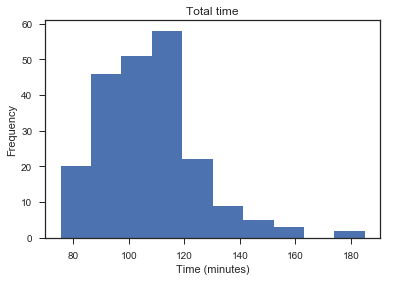

In [10]:
# Note that I have to call the `.values` method to get a numpy array to pass to plt.hist()
plt.hist(results[["time_total"]].dropna().values)
plt.title("Total time")
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")

plt.show()

In [18]:
# Trying to get plotly to work offline and not really succeeding...!
# data = [go.Histogram(x=results[["time_total"]].dropna().values)]

# py.iplot(results[["time_total"]].dropna().values)

# iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
#        go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

# iplot([go.Histogram(x=results[["time_total"]].dropna().values)])

In [114]:
my_time_total = results[results['name'] == myname][["time_total"]].values
my_time_total_rank = (results[["time_total"]] >= my_time_total).values.sum()
my_time_total_percentile = (1-(my_time_total_rank/len(results[["time_total"]])))*100
print("For time_total, ", myname, ", your percentile is: ",round(my_time_total_percentile,0), sep = "")

othername = "Rachel Kidd"
other_time_total = results[results['name'] == othername][["time_total"]].values
other_time_total_rank = (results[["time_total"]] >= other_time_total).values.sum()
other_time_total_percentile = (1-(other_time_total_rank/len(results[["time_total"]])))*100
print("For time_total, ", othername, "'s percentile is: ",round(other_time_total_percentile,0), sep = "")

diff_time_total = float([abs(my_time_total - other_time_total)][0])

if other_time_total > my_time_total:
    print(myname, ", you were ", round(diff_time_total,2), " minutes faster than ", othername, ".", sep = "")
elif other_time_total < my_time_total:
    print(myname, ", you were ", round(diff_time_total,2), " minutes slower than ", othername, ".", sep = "")
elif other_time_total == my_time_total:
    print(myname, ", you took exactly the same amount of time as ", othername, ".", sep = "")

For time_total, Lindsay Brin, your percentile is: 23.0
For time_total, Rachel Kidd's percentile is: 23.0
Lindsay Brin, you were 0.03 minutes slower than Rachel Kidd.
